# Classifiers/Ensemble Methods

We have tried to use linear regression in order to predict today's closing stock price. We know that it is overfitting and so want to add more features in order to make our model more accurate. Some possible features that we can add to our model would be relative strength index, moving average convergence divergence, and simple moving average. 

Let's try to run the classifiers with the dataframe that we created for linear regression. 

Before that though, we should install the correct version of Pandas so our dataset does not crash.

In [1]:
%pip install pandas==1.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 47.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy
import pickle

We are trying to use the scaled features from yfinance on Microsoft data from April 12, 2016 to April 12, 2023. The Simple Moving Averages were obtained from "Technical Indicators - Simple Moving Averages" and were scaled after in this notebook (SMA 10, 50, 100). The labels that were read from the pickle file were originally the current closing stock prices. We have changed that and used outcomes.pkl instead for the labels - this is to stop the continuous data type error. 

In [3]:
#the dataframe that we use in order to train our linear regression model.
msft_scaled_features = pd.read_pickle('msft_scaled_features.pkl')
msft_labels = pd.read_pickle('msft_labels.pkl')
msft_sma = pd.read_pickle('msft_sma_features.pkl')

In [4]:
msft_scaled_features.head()
msft_labels.head()

,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,yesterday,curr_open,today
0,-1.281909,-1.281896,-1.283973,-1.279230,-0.318316,0.0,2016-04-12,-1.275513,2016-04-13
1,-1.274124,-1.275123,-1.272102,-1.271966,-0.639944,0.0,2016-04-13,-1.274475,2016-04-14
2,-1.273086,-1.273687,-1.270211,-1.271863,-0.635337,0.0,2016-04-14,-1.273645,2016-04-15
3,-1.272256,-1.270198,-1.269790,-1.268854,-0.018263,0.0,2016-04-15,-1.271673,2016-04-18
4,-1.270284,-1.263323,-1.268740,-1.260449,-0.408600,0.0,2016-04-18,-1.259842,2016-04-19


0    49.855217
1    49.864235
2    50.125439
3    50.855022
4    50.791977
Name: curr_close, dtype: float64

In [5]:
msft_scaled_features.count()

past_open            1761
past_high            1761
past_low             1761
past_close           1761
past_volume          1761
past_stock_splits    1761
yesterday            1761
curr_open            1761
today                1761
dtype: int64

Cleaned up the Simple Moving Averages dataframe and took only the pertaining features (SMA_10, SMA_50, and SMA_100).

In [6]:
msft_sma.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_50,SMA_100,Date
110,54.369999,54.779999,53.759998,54.650002,49.224701,24944300,54.880,52.8116,53.4032,2016-04-12
111,55.119999,55.439999,54.889999,55.349998,49.855228,20818000,54.910,52.8244,53.4270,2016-04-13
112,55.220001,55.580002,55.070000,55.360001,49.864227,20877100,54.923,52.8716,53.4421,2016-04-14
113,55.299999,55.919998,55.110001,55.650002,50.125439,28793800,54.931,52.9414,53.4592,2016-04-15
114,55.490002,56.590000,55.209999,56.459999,50.855011,23786000,55.034,53.0306,53.4819,2016-04-18


In [7]:
msft_sma.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10',
       'SMA_50', 'SMA_100', 'Date'],
      dtype='object')

In [8]:
msft_sma = msft_sma.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [9]:
msft_sma.head()
msft_sma.count

,SMA_10,SMA_50,SMA_100,Date
110,54.880,52.8116,53.4032,2016-04-12
111,54.910,52.8244,53.4270,2016-04-13
112,54.923,52.8716,53.4421,2016-04-14
113,54.931,52.9414,53.4592,2016-04-15
114,55.034,53.0306,53.4819,2016-04-18


<bound method DataFrame.count of           SMA_10      SMA_50     SMA_100       Date
110    54.880000   52.811600   53.403200 2016-04-12
111    54.910000   52.824400   53.427000 2016-04-13
112    54.923000   52.871600   53.442100 2016-04-14
113    54.931000   52.941400   53.459200 2016-04-15
114    55.034000   53.030600   53.481900 2016-04-18
...          ...         ...         ...        ...
1867  280.940002  262.261401  251.899800 2023-04-04
1868  282.145001  263.107401  252.498100 2023-04-05
1869  283.539001  264.127202  252.984301 2023-04-06
1870  284.421002  264.955002  253.407101 2023-04-10
1871  285.066000  265.648401  253.819901 2023-04-11

[1762 rows x 4 columns]>

In [10]:
msft_sma = msft_sma.drop(msft_sma.index[-1])
msft_sma = msft_sma.reset_index(drop=True)

msft_sma.head()
msft_sma.count()


,SMA_10,SMA_50,SMA_100,Date
0,54.880,52.8116,53.4032,2016-04-12
1,54.910,52.8244,53.4270,2016-04-13
2,54.923,52.8716,53.4421,2016-04-14
3,54.931,52.9414,53.4592,2016-04-15
4,55.034,53.0306,53.4819,2016-04-18


SMA_10     1761
SMA_50     1761
SMA_100    1761
Date       1761
dtype: int64

All of the simple moving averages are taken from yesterday - treat all the features as historical data except for the **curr_open** stock price. 

In [11]:
msft_features_sma = pd.merge(msft_scaled_features, msft_sma, left_index=True, right_index=True)

In [12]:
msft_features_sma.drop(columns="Date").reset_index(drop=True)
msft_features_sma.head()

,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,yesterday,curr_open,today,SMA_10,SMA_50,SMA_100
0,-1.281909,-1.281896,-1.283973,-1.279230,-0.318316,0.0,2016-04-12,-1.275513,2016-04-13,54.880000,52.811600,53.403200
1,-1.274124,-1.275123,-1.272102,-1.271966,-0.639944,0.0,2016-04-13,-1.274475,2016-04-14,54.910000,52.824400,53.427000
2,-1.273086,-1.273687,-1.270211,-1.271863,-0.635337,0.0,2016-04-14,-1.273645,2016-04-15,54.923000,52.871600,53.442100
3,-1.272256,-1.270198,-1.269790,-1.268854,-0.018263,0.0,2016-04-15,-1.271673,2016-04-18,54.931000,52.941400,53.459200
4,-1.270284,-1.263323,-1.268740,-1.260449,-0.408600,0.0,2016-04-18,-1.259842,2016-04-19,55.034000,53.030600,53.481900
...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1.455314,1.440061,1.463027,1.462486,-0.323070,0.0,2023-04-03,1.461762,2023-04-04,279.600003,261.369402,251.316700
1757,1.463496,1.464897,1.483088,1.461910,-0.249723,0.0,2023-04-04,1.445862,2023-04-05,280.940002,262.261401,251.899800
1758,1.447594,1.427302,1.451014,1.429195,-0.542761,0.0,2023-04-05,1.415445,2023-04-06,282.145001,263.107401,252.498100
1759,1.417173,1.483466,1.440634,1.512827,0.057851,0.0,2023-04-06,1.484574,2023-04-10,283.539001,264.127202,252.984301


,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,yesterday,curr_open,today,SMA_10,SMA_50,SMA_100,Date
0,-1.281909,-1.281896,-1.283973,-1.279230,-0.318316,0.0,2016-04-12,-1.275513,2016-04-13,54.880,52.8116,53.4032,2016-04-12
1,-1.274124,-1.275123,-1.272102,-1.271966,-0.639944,0.0,2016-04-13,-1.274475,2016-04-14,54.910,52.8244,53.4270,2016-04-13
2,-1.273086,-1.273687,-1.270211,-1.271863,-0.635337,0.0,2016-04-14,-1.273645,2016-04-15,54.923,52.8716,53.4421,2016-04-14
3,-1.272256,-1.270198,-1.269790,-1.268854,-0.018263,0.0,2016-04-15,-1.271673,2016-04-18,54.931,52.9414,53.4592,2016-04-15
4,-1.270284,-1.263323,-1.268740,-1.260449,-0.408600,0.0,2016-04-18,-1.259842,2016-04-19,55.034,53.0306,53.4819,2016-04-18


In [13]:
msft_features_sma = msft_features_sma.drop(columns=['today', 'yesterday'])

In [14]:
msft_features_sma.head()

,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,curr_open,SMA_10,SMA_50,SMA_100,Date
0,-1.281909,-1.281896,-1.283973,-1.279230,-0.318316,0.0,-1.275513,54.880,52.8116,53.4032,2016-04-12
1,-1.274124,-1.275123,-1.272102,-1.271966,-0.639944,0.0,-1.274475,54.910,52.8244,53.4270,2016-04-13
2,-1.273086,-1.273687,-1.270211,-1.271863,-0.635337,0.0,-1.273645,54.923,52.8716,53.4421,2016-04-14
3,-1.272256,-1.270198,-1.269790,-1.268854,-0.018263,0.0,-1.271673,54.931,52.9414,53.4592,2016-04-15
4,-1.270284,-1.263323,-1.268740,-1.260449,-0.408600,0.0,-1.259842,55.034,53.0306,53.4819,2016-04-18


Brought in the twitter sentiment features (interactions and avg twitter sentiment) and merged them into the preceding dataframe, **msft_official_df**. 

In [15]:
msft_avg_twitter = pd.read_pickle('avg_twitter_sentiment.pkl')

In [16]:
#msft_avg_twitter = msft_avg_twitter.reset_index(drop=True)
msft_avg_twitter.head()

,sentiment,interaction_num
tweet_date,,
2015-01-01,0.500000,0.001062
2015-01-02,0.495238,0.000675
2015-01-03,0.474576,0.000702
2015-01-04,0.500000,0.000608
2015-01-05,0.373913,0.001206


In [17]:
msft_avg_twitter['Date'] = msft_avg_twitter.index

In [18]:
msft_avg_twitter = msft_avg_twitter.reset_index(drop=True)
msft_avg_twitter.head()
msft_avg_twitter['Date']

,sentiment,interaction_num,Date
0,0.500000,0.001062,2015-01-01
1,0.495238,0.000675,2015-01-02
2,0.474576,0.000702,2015-01-03
3,0.500000,0.000608,2015-01-04
4,0.373913,0.001206,2015-01-05


0       2015-01-01
1       2015-01-02
2       2015-01-03
3       2015-01-04
4       2015-01-05
           ...    
1821    2019-12-27
1822    2019-12-28
1823    2019-12-29
1824    2019-12-30
1825    2019-12-31
Name: Date, Length: 1826, dtype: object

It took a long time to compile all of the tweets about Microsoft. The range is from **2015-01-01 to 2019-12-31**. We should then subset the **msft_features_sma** and the **msft_twitter** to match those following time indices. 

In [19]:
msft_avg_twitter['Date'] = msft_avg_twitter['Date'].apply(str)

In [20]:
msft_avg_twitter = msft_avg_twitter[msft_avg_twitter['Date'] > '2016-04-11']

In [21]:
msft_avg_twitter.count

<bound method DataFrame.count of       sentiment  interaction_num        Date
467    0.258278         0.000644  2016-04-12
468    0.186567         0.000318  2016-04-13
469    0.267380         0.001376  2016-04-14
470    0.284974         0.000586  2016-04-15
471    0.521739         0.001744  2016-04-16
...         ...              ...         ...
1821   0.578947         0.003100  2019-12-27
1822   0.494382         0.012883  2019-12-28
1823   0.585714         0.008708  2019-12-29
1824   0.559846         0.002935  2019-12-30
1825   0.588235         0.003211  2019-12-31

[1359 rows x 3 columns]>

In [22]:
msft_avg_twitter = msft_avg_twitter.reset_index(drop=True)
msft_avg_twitter.head()
msft_avg_twitter.tail()

,sentiment,interaction_num,Date
0,0.258278,0.000644,2016-04-12
1,0.186567,0.000318,2016-04-13
2,0.267380,0.001376,2016-04-14
3,0.284974,0.000586,2016-04-15
4,0.521739,0.001744,2016-04-16


,sentiment,interaction_num,Date
1354,0.578947,0.003100,2019-12-27
1355,0.494382,0.012883,2019-12-28
1356,0.585714,0.008708,2019-12-29
1357,0.559846,0.002935,2019-12-30
1358,0.588235,0.003211,2019-12-31


In [23]:
msft_features_sma = msft_features_sma[msft_features_sma['Date'] <= '2019-12-31']

#msft_avg_twitter = pd.merge(msft_avg_twitter, msft_features_sma, on='Date')


In [24]:
msft_features_sma.head()
print(msft_features_sma.tail())

,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,curr_open,SMA_10,SMA_50,SMA_100,Date
0,-1.281909,-1.281896,-1.283973,-1.279230,-0.318316,0.0,-1.275513,54.880,52.8116,53.4032,2016-04-12
1,-1.274124,-1.275123,-1.272102,-1.271966,-0.639944,0.0,-1.274475,54.910,52.8244,53.4270,2016-04-13
2,-1.273086,-1.273687,-1.270211,-1.271863,-0.635337,0.0,-1.273645,54.923,52.8716,53.4421,2016-04-14
3,-1.272256,-1.270198,-1.269790,-1.268854,-0.018263,0.0,-1.271673,54.931,52.9414,53.4592,2016-04-15
4,-1.270284,-1.263323,-1.268740,-1.260449,-0.408600,0.0,-1.259842,55.034,53.0306,53.4819,2016-04-18


     past_open  past_high  past_low  past_close  past_volume   
933  -0.086479  -0.101669 -0.071645   -0.088164    -1.561950  \
934  -0.085586  -0.090401 -0.068478   -0.073753    -1.130800   
935  -0.064466  -0.081341 -0.059204   -0.070513    -0.827419   
936  -0.069606  -0.087197 -0.076056   -0.085818    -0.988331   
937  -0.094413  -0.101006 -0.079223   -0.084589    -0.830802   

     past_stock_splits  curr_open      SMA_10      SMA_50   SMA_100       Date  
933                0.0  -0.087124  155.197002  147.871001  142.5666 2019-12-24  
934                0.0  -0.066007  155.894002  148.213000  142.8312 2019-12-26  
935                0.0  -0.071146  156.466002  148.584001  143.0739 2019-12-27  
936                0.0  -0.095950  156.772002  148.942000  143.2970 2019-12-30  
937                0.0  -0.073493  156.989001  149.347800  143.4851 2019-12-31  


In [25]:
import pandas as pd

msft_features_sma['Date'] = pd.to_datetime(msft_features_sma['Date'])
msft_avg_twitter['Date'] = pd.to_datetime(msft_avg_twitter['Date'])

# join the two dataframes on the "date" column
msft_official_df = pd.merge(msft_features_sma, msft_avg_twitter, on='Date', how='left')

# subset the merged DataFrame for weekdays only
#weekday_subset = merged_df[merged_df['weekday'].notna()]

# print the resulting DataFrame
print(msft_official_df)

     past_open  past_high  past_low  past_close  past_volume   
0    -1.281909  -1.281896 -1.283973   -1.279230    -0.318316  \
1    -1.274124  -1.275123 -1.272102   -1.271966    -0.639944   
2    -1.273086  -1.273687 -1.270211   -1.271863    -0.635337   
3    -1.272256  -1.270198 -1.269790   -1.268854    -0.018263   
4    -1.270284  -1.263323 -1.268740   -1.260449    -0.408600   
..         ...        ...       ...         ...          ...   
933  -0.086479  -0.101669 -0.071645   -0.088164    -1.561950   
934  -0.085586  -0.090401 -0.068478   -0.073753    -1.130800   
935  -0.064466  -0.081341 -0.059204   -0.070513    -0.827419   
936  -0.069606  -0.087197 -0.076056   -0.085818    -0.988331   
937  -0.094413  -0.101006 -0.079223   -0.084589    -0.830802   

     past_stock_splits  curr_open      SMA_10      SMA_50   SMA_100   
0                  0.0  -1.275513   54.880000   52.811600   53.4032  \
1                  0.0  -1.274475   54.910000   52.824400   53.4270   
2                 

We will be using this as our official dataframe: financial indicators, simple moving averages, and twitter sentiment features. These will be the final list of features with a total sum of 938 rows - the number of days the market was open from April 12, 2016 and December 31, 2019 - the intersecting dataset from yfinance and the Kaggle Dataset with the tweets of Microsoft. 

In [26]:
msft_official_df.head()

,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,curr_open,SMA_10,SMA_50,SMA_100,Date,sentiment,interaction_num
0,-1.281909,-1.281896,-1.283973,-1.279230,-0.318316,0.0,-1.275513,54.880,52.8116,53.4032,2016-04-12,0.258278,0.000644
1,-1.274124,-1.275123,-1.272102,-1.271966,-0.639944,0.0,-1.274475,54.910,52.8244,53.4270,2016-04-13,0.186567,0.000318
2,-1.273086,-1.273687,-1.270211,-1.271863,-0.635337,0.0,-1.273645,54.923,52.8716,53.4421,2016-04-14,0.267380,0.001376
3,-1.272256,-1.270198,-1.269790,-1.268854,-0.018263,0.0,-1.271673,54.931,52.9414,53.4592,2016-04-15,0.284974,0.000586
4,-1.270284,-1.263323,-1.268740,-1.260449,-0.408600,0.0,-1.259842,55.034,53.0306,53.4819,2016-04-18,0.343434,0.001276


In [27]:
msft_official_df.tail()

,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,curr_open,SMA_10,SMA_50,SMA_100,Date,sentiment,interaction_num
933,-0.086479,-0.101669,-0.071645,-0.088164,-1.561950,0.0,-0.087124,155.197002,147.871001,142.5666,2019-12-24,0.577586,0.002329
934,-0.085586,-0.090401,-0.068478,-0.073753,-1.130800,0.0,-0.066007,155.894002,148.213000,142.8312,2019-12-26,0.552486,0.002492
935,-0.064466,-0.081341,-0.059204,-0.070513,-0.827419,0.0,-0.071146,156.466002,148.584001,143.0739,2019-12-27,0.578947,0.003100
936,-0.069606,-0.087197,-0.076056,-0.085818,-0.988331,0.0,-0.095950,156.772002,148.942000,143.2970,2019-12-30,0.559846,0.002935
937,-0.094413,-0.101006,-0.079223,-0.084589,-0.830802,0.0,-0.073493,156.989001,149.347800,143.4851,2019-12-31,0.588235,0.003211


We decided to scale data from SMA_10, SMA_50, and SMA_100 with the StandardScaler due to it to it being related to stock prices - doesn't range from 0 to 1. We scaled the remaining sentiment features with the MinMaxScaler due to those limits. 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

to_standard = ['SMA_10', 'SMA_50', 'SMA_100']
to_minmax = ['sentiment']

msft_official_df[to_standard] = standard_scaler.fit_transform(msft_official_df[to_standard])
msft_official_df[to_minmax] = minmax_scaler.fit_transform(msft_official_df[to_minmax])

In [29]:
msft_official_df.tail()

,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,curr_open,SMA_10,SMA_50,SMA_100,Date,sentiment,interaction_num
933,-0.086479,-0.101669,-0.071645,-0.088164,-1.561950,0.0,-0.087124,2.169882,2.057962,2.023801,2019-12-24,0.735004,0.002329
934,-0.085586,-0.090401,-0.068478,-0.073753,-1.130800,0.0,-0.066007,2.193760,2.070075,2.033505,2019-12-26,0.687823,0.002492
935,-0.064466,-0.081341,-0.059204,-0.070513,-0.827419,0.0,-0.071146,2.213357,2.083215,2.042405,2019-12-27,0.737563,0.003100
936,-0.069606,-0.087197,-0.076056,-0.085818,-0.988331,0.0,-0.095950,2.223840,2.095894,2.050587,2019-12-30,0.701657,0.002935
937,-0.094413,-0.101006,-0.079223,-0.084589,-0.830802,0.0,-0.073493,2.231274,2.110267,2.057485,2019-12-31,0.755021,0.003211


In [30]:
msft_official_df = msft_official_df.drop(columns=['Date'])
msft_official_df.columns
msft_official_df.count
msft_official_df = msft_official_df.drop(msft_official_df.index[-1])

Index(['past_open', 'past_high', 'past_low', 'past_close', 'past_volume',
       'past_stock_splits', 'curr_open', 'SMA_10', 'SMA_50', 'SMA_100',
       'sentiment', 'interaction_num'],
      dtype='object')

<bound method DataFrame.count of      past_open  past_high  past_low  past_close  past_volume   
0    -1.281909  -1.281896 -1.283973   -1.279230    -0.318316  \
1    -1.274124  -1.275123 -1.272102   -1.271966    -0.639944   
2    -1.273086  -1.273687 -1.270211   -1.271863    -0.635337   
3    -1.272256  -1.270198 -1.269790   -1.268854    -0.018263   
4    -1.270284  -1.263323 -1.268740   -1.260449    -0.408600   
..         ...        ...       ...         ...          ...   
933  -0.086479  -0.101669 -0.071645   -0.088164    -1.561950   
934  -0.085586  -0.090401 -0.068478   -0.073753    -1.130800   
935  -0.064466  -0.081341 -0.059204   -0.070513    -0.827419   
936  -0.069606  -0.087197 -0.076056   -0.085818    -0.988331   
937  -0.094413  -0.101006 -0.079223   -0.084589    -0.830802   

     past_stock_splits  curr_open    SMA_10    SMA_50   SMA_100  sentiment   
0                  0.0  -1.275513 -1.266864 -1.308844 -1.246069   0.134796  \
1                  0.0  -1.274475 -1.26583

In [31]:
msft_official_df.head()

,past_open,past_high,past_low,past_close,past_volume,past_stock_splits,curr_open,SMA_10,SMA_50,SMA_100,sentiment,interaction_num
0,-1.281909,-1.281896,-1.283973,-1.279230,-0.318316,0.0,-1.275513,-1.266864,-1.308844,-1.246069,0.134796,0.000644
1,-1.274124,-1.275123,-1.272102,-1.271966,-0.639944,0.0,-1.274475,-1.265836,-1.308391,-1.245196,0.000000,0.000318
2,-1.273086,-1.273687,-1.270211,-1.271863,-0.635337,0.0,-1.273645,-1.265391,-1.306719,-1.244642,0.151904,0.001376
3,-1.272256,-1.270198,-1.269790,-1.268854,-0.018263,0.0,-1.271673,-1.265116,-1.304247,-1.244015,0.184977,0.000586
4,-1.270284,-1.263323,-1.268740,-1.260449,-0.408600,0.0,-1.259842,-1.261588,-1.301087,-1.243183,0.294865,0.001276


In [32]:
msft_labels_updated = pd.read_pickle('msft_labels_updated.pkl')

In [33]:
msft_labels_updated = msft_labels_updated.drop(columns=['Date'])

In [34]:
msft_labels_updated.to_pickle('final_labels.pkl')
msft_official_df.to_pickle('final_features.pkl')

We saved our cleaned/scaled data to final_features. This will be used to determine our "Outcomes" column which is binary. 

In [35]:
null_values = msft_labels_updated.isnull().sum()
print(null_values)

na_values = msft_labels_updated.isna().sum()
print(na_values)

Close    0
dtype: int64
Close    0
dtype: int64


In [36]:
outcome = pd.read_pickle('outcome.pkl')

In [37]:
outcome.head()

0    1
1    1
2    1
3    1
4    0
Name: outcome, dtype: int64

This will be our binary label instead of having closing stock prices as our labels. 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier


lr_vanilla = LogisticRegression(penalty="none") # OR penalty="none" depending on your sklearn version
svm_linear = SVC(kernel="linear")
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=23) # some random seed for reproducibility
grad_boost = GradientBoostingClassifier()
voting = VotingClassifier(estimators=[("1",lr_vanilla),("2",svm_linear),("3",dt)])

all_models = {"lr":lr_vanilla, 
              "svm":svm_linear,
              "decision_tree":dt,
              "random_forest":rf,
              "grad_boost":grad_boost,
              "voting":voting}

print (f"We are working with classifiers {all_models.keys()}")

We are working with classifiers dict_keys(['lr', 'svm', 'decision_tree', 'random_forest', 'grad_boost', 'voting'])


After establishing the different types of classifiers along with some ensemble methods, we will be implementing cross validation with 5 folds. 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# First extract our test data and store it in x_test, y_test
features = msft_official_df.to_numpy()  
labels = outcome.to_numpy()  
_x, x_test, _y, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

k = 5 # 5-fold

# We can use sklearn's cross validation score directly
# We can speed up training using n_jobs parameter which specifies how many cpu_cores to use

best_model_name = ""
best_model_valid_accuracy = 0
best_model = None

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,_x,_y.flatten(), cv=k, n_jobs=4, error_score='raise')
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

We found that the best model was the ensemble method, the voting classifier: a combination of decision trees, support vectors, and logistic regression. The accuracy of the model was 54.81% while the accuracy of the cross validation would be around 54.81% as well. 

### Evaluation Methods

In [40]:
# Checking Accuracy
from sklearn.metrics import accuracy_score

# Let's fit the best model again with train+valid data
# This is the model we are gonna ship/deploy to practice

best_model.fit(_x,_y.flatten())

y_pred_test = best_model.predict(x_test)
test_accuracy = accuracy_score(y_pred_test, y_test.flatten())

print (f"Test accuracy for model {test_accuracy}")

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('1', LogisticRegression(penalty='none')),
                             ('2', SVC(kernel='linear')),
                             ('3', DecisionTreeClassifier())])

Test accuracy for model 0.48936170212765956


### Feature Ablation

In [41]:
#Let's run ablation tests on our best model
# You could choose any model to do this test
max_iter = 1000
feature_names = msft_official_df.columns  

# Let's maintain an accuracy dictionary

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")

    x_ablated = numpy.delete(_x,i,axis=1) # axis = 1 means columns
    
    cv_scores = cross_val_score(best_model,x_ablated,_y.flatten(), cv=k, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy = {average_cv_score}")
    accuracy_drop_log[feature_name] = best_model_valid_accuracy-average_cv_score

Removing feature past_open
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

We ran feature ablation on the features to see importance and impact on accuracy that each one had. 

<BarContainer object of 13 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'No ablation'),
  Text(1, 0, 'past_open'),
  Text(2, 0, 'past_high'),
  Text(3, 0, 'past_low'),
  Text(4, 0, 'past_close'),
  Text(5, 0, 'past_volume'),
  Text(6, 0, 'past_stock_splits'),
  Text(7, 0, 'curr_open'),
  Text(8, 0, 'SMA_10'),
  Text(9, 0, 'SMA_50'),
  Text(10, 0, 'SMA_100'),
  Text(11, 0, 'sentiment'),
  Text(12, 0, 'interaction_num')])

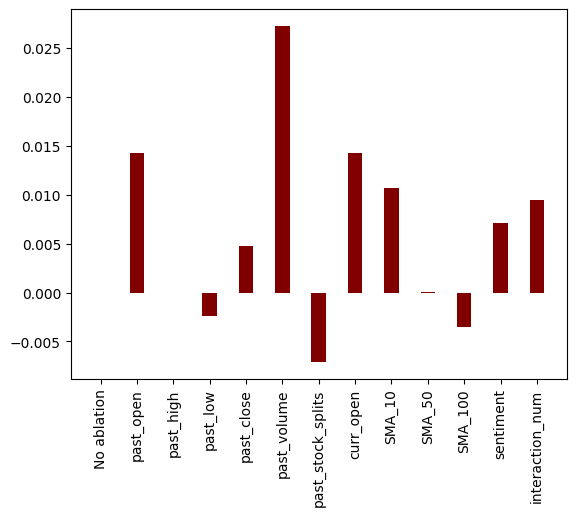

In [42]:
from matplotlib import pyplot as plt

plt.bar(accuracy_drop_log.keys(), accuracy_drop_log.values(), color="maroon", width = 0.4)
plt.xticks(rotation="vertical")

In [43]:
def criteria(l):
    return l[1]

sorted_accs =  sorted(accuracy_drop_log.items(),key=criteria, reverse=True)

print (f"Features are ranked from best to worst (based on how removing them impacts the accuracy of {best_model_name})")
print (f"**************************************")

i=1
for entry in sorted_accs:
    feature_name = entry[0]
    acc_drop = entry[1]
    
    # We do not want to print "No ablation"
    if feature_name != "No ablation":
        print (f"Feature {i}.{feature_name}, drop in acc {acc_drop}")
        i=i+1

Features are ranked from best to worst (based on how removing them impacts the accuracy of voting)
**************************************
Feature 1.past_volume, drop in acc 0.027261200338123515
Feature 2.past_open, drop in acc 0.014250493096647054
Feature 3.curr_open, drop in acc 0.014229360383206657
Feature 4.SMA_10, drop in acc 0.010700197238659004
Feature 5.interaction_num, drop in acc 0.009481544096928807
Feature 6.sentiment, drop in acc 0.0071428571428572285
Feature 7.past_close, drop in acc 0.004740772048464348
Feature 8.SMA_50, drop in acc 7.044237813613741e-06
Feature 9.past_high, drop in acc 1.1102230246251565e-16
Feature 10.past_low, drop in acc -0.002387996618765764
Feature 11.SMA_100, drop in acc -0.003543251620174437
Feature 12.past_stock_splits, drop in acc -0.007114680191603107


It seems like the past_volume seems to dictate the accuracy of the voting model the most with technical indicators such as simple moving average (50 and 100) being the least important - impacting accuracy negatively. Sentiment as a feature along with the average interaction have some impact - being ranked 4th and 5th out of 12 features. The historical features seem to have not as much as an impact as linear regression had stated from before. This makes sense because of collinearity and also abides by the efficient market hypothesis where all available information - historical data - will be useless in terms of getting some profit/loss. 

### F1 Score and Correlation Heat Map

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

_x, x_test, _y, y_test

svm_linear = SVC(kernel="linear")

svm_linear.fit(_x,_y)

# now predict and compute acuracy
test_actual = y_test
test_predicted = svm_linear.predict(x_test)

print (classification_report(test_actual,test_predicted))

(array([[-4.54560308e-01, -4.68013486e-01, -4.55192352e-01, ...,
          1.03693644e+00,  6.43736570e-01,  1.44968513e-03],
        [-1.30879363e+00, -1.31072037e+00, -1.30847957e+00, ...,
         -1.28936118e+00,  3.82077036e-01,  2.29590114e-04],
        [-1.14670084e+00, -1.14157915e+00, -1.14308167e+00, ...,
         -8.65874874e-01,  3.76417171e-01,  5.98180345e-04],
        ...,
        [-3.32659849e-01, -3.43639399e-01, -3.25995747e-01, ...,
          1.67817471e+00,  6.32101855e-01,  2.42279613e-03],
        [-9.13929421e-01, -9.20364435e-01, -9.12005031e-01, ...,
         -3.04352227e-01,  6.98449938e-01,  1.28478335e-03],
        [-1.23855812e+00, -1.24303554e+00, -1.23975344e+00, ...,
         -1.23924783e+00,  4.96211307e-01,  3.56084818e-04]]),
 array([[-1.05152398e+00, -1.05705620e+00, -1.05413257e+00, ...,
         -7.08618316e-01,  4.58803710e-01,  1.65245060e-03],
        [-1.26113465e+00, -1.26298109e+00, -1.25886482e+00, ...,
         -1.28172591e+00,  3.11437333e

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.55      1.00      0.71        52

    accuracy                           0.55        94
   macro avg       0.28      0.50      0.36        94
weighted avg       0.31      0.55      0.39        94

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

In [45]:
from sklearn import metrics, neighbors

clf = neighbors.KNeighborsClassifier()

confusion_matrix = metrics.confusion_matrix(test_actual,test_predicted)
print(confusion_matrix)

[[ 0 42]
 [ 0 52]]


As we can see here, we were able to get a classification report from our test actual and test predicted. Precision measures the number of true positive predictions out of all positive predictions while recall measures the positive predictions out of all the predictions in the class (which would either be 0 or 1). *As stated before, the 0 outcome represents when current stock closing prices are lower than current stock opening prices and vice versa for 1. 

In this case, it seems like there was 42 instances of all positive predictions for class 0 which resulted in a 0% precision and 0% recall. This seems to be concerning since this means that there weren't any predictions for class 0 at all. The confusion matrix seems to suggest the same thing so we should update and add to our model in order to make better predictions. 

On the other side, there were 52 instances of all positive predictions for class 1 which resulted in 55% precision and 100% recall. 55% precision means that the model gets the outcome - higher stock closing price right for that many times (True Positive/(True Positive+False Positive)). Recall would be (True Positive/(True Positive + False Negative)) with false negatives being the number of times that an outcome mistakenly predicts the outcome to be different which would be 0 in this case. 

As stated before in class, our F1 score is calculated through a harmonic mean of precision and recall which gives us 0.71 compared to our actual accuracy 55.3% (55/94 instances).

<Figure size 1200x1000 with 0 Axes>

<AxesSubplot: >

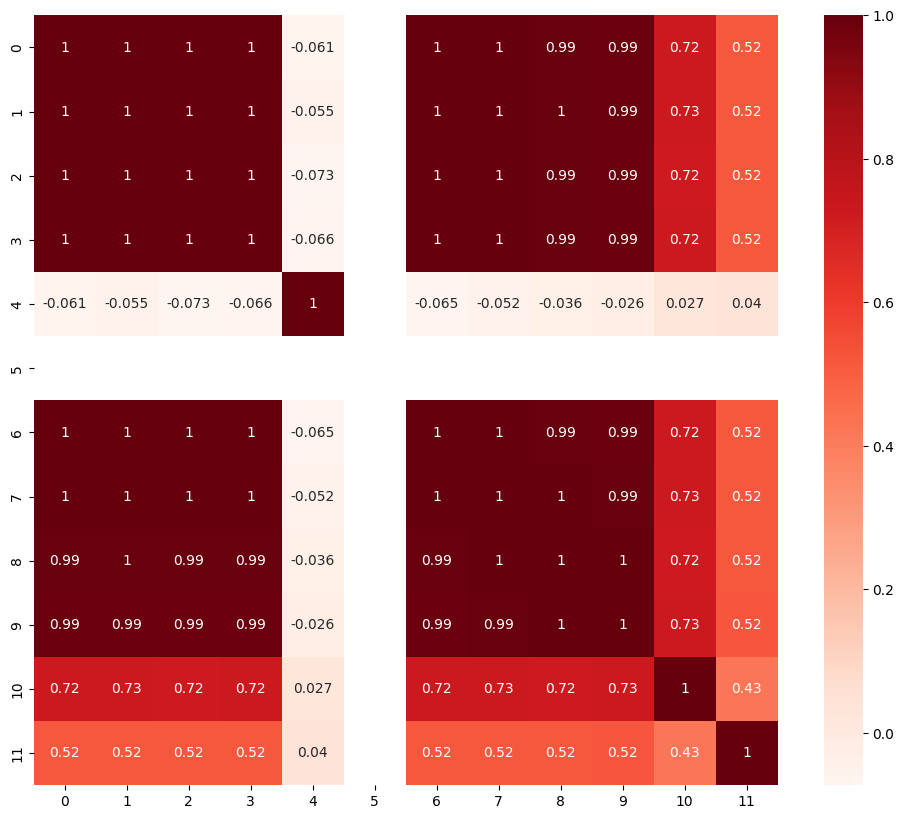

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
cor = pd.DataFrame(_x).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [47]:
msft_official_df.columns

Index(['past_open', 'past_high', 'past_low', 'past_close', 'past_volume',
       'past_stock_splits', 'curr_open', 'SMA_10', 'SMA_50', 'SMA_100',
       'sentiment', 'interaction_num'],
      dtype='object')

This is an example of a correlation heat map where we put in the features that we use for a graphical representation of each feature. 

For instance we can see that feature 4 and 5 which are (past_volume and past_stock_splits) seem to have little/no correlation with the other features -  sma, historical data, and sentiment features. 

Unsuprisingly, the historical data, features 0 - 3, and the technical indicators, features 6-9 (starting from curr_open), have the greatest correlation with each other. They have established some sense of collinearity/redundancy with each other and so future attempts at creating a model could address these features. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f501a8e-f6e4-43a9-b4a2-6516b2e3d333' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>